# Machine Learning Exercises Solution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [2]:
# Load the dataset ../data/housing-data.csv
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [3]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

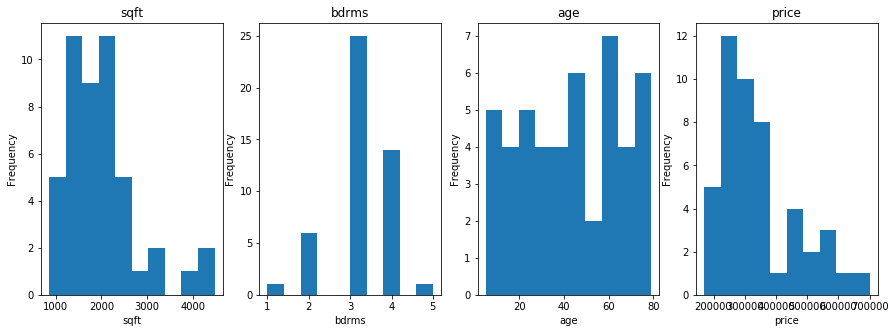

In [5]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [11]:
# create 2 variables called X and y:
# X shall be a matrix with 3 columns (sqft,bdrms,age)
# and y shall be a vector with 1 column (price)
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [12]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [13]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500], dtype=int64)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [15]:
# create a linear regression model in Keras
# with the appropriate number of inputs and output
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# split the data into train and test with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
len(X_train)

37

In [20]:
len(X)

47

In [21]:
# train the model on the training set and check its accuracy on training and test set
# how's your model doing? Is the loss growing smaller?
model.fit(X_train, y_train)

Epoch 1/1
37/37 [==============================] - 1s 16ms/step - loss: 134720024686.7027


In [22]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [23]:
from sklearn.metrics import r2_score

In [24]:
# check the R2score on training and test set (probably very bad)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-6.635
The R2 score on the Test set is:	-13.593


In [25]:
# try to improve your model with these experiments:
#     - normalize the input features with one of the rescaling techniques mentioned above
#     - use a different value for the learning rate of your model
#     - use a different optimizer
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [26]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 1s 20ms/step - loss: 18.8460
Epoch 2/20
37/37 [==============================] - 0s 352us/step - loss: 4.9806
Epoch 3/20
37/37 [==============================] - 0s 379us/step - loss: 0.4924
Epoch 4/20
37/37 [==============================] - 0s 676us/step - loss: 2.6347
Epoch 5/20
37/37 [==============================] - 0s 487us/step - loss: 5.6860
Epoch 6/20
37/37 [==============================] - 0s 460us/step - loss: 5.5026
Epoch 7/20
37/37 [==============================] - 0s 433us/step - loss: 3.1806
Epoch 8/20
37/37 [==============================] - 0s 433us/step - loss: 1.0276
Epoch 9/20
37/37 [==============================] - 0s 379us/step - loss: 0.6087
Epoch 10/20
37/37 [==============================] - 0s 406us/step - loss: 1.3434
Epoch 11/20
37/37 [==============================] - 0s 433us/step - loss: 2.0863
Epoch 12/20
37/37 [==============================] - 0s 379us/step - loss: 2.1149
Epoch 13/20
37/37 [======

In [29]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.629
The R2 score on the Test set is:	0.469


In [61]:
model.fit(X_train, y_train, epochs=40)

In [31]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.737
The R2 score on the Test set is:	0.592


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [32]:
# load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.

df = pd.read_csv('../data/HR_comma_sep.csv')

In [33]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [36]:
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

Predicting 0 all the time would yield an accuracy of 76%

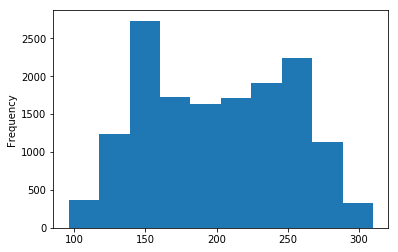

In [37]:
# Check if any feature needs rescaling.
# You may plot a histogram of the feature to decide which rescaling method is more appropriate.
df['average_montly_hours'].plot(kind='hist')

In [38]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

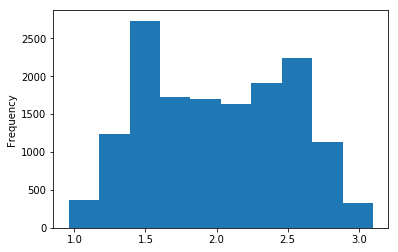

In [39]:
df['average_montly_hours_100'].plot(kind='hist')

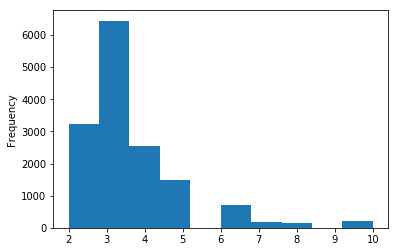

In [40]:
df['time_spend_company'].plot(kind='hist')

In [41]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [42]:
df_dummies.head()


,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [44]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [45]:
X.shape

(14999, 20)

In [46]:
# do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
# play around with learning rate and optimizer

model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train, y_train)

Epoch 1/1
11999/11999 [==============================] - 3s 210us/step - loss: 0.5739 - acc: 0.7611


In [50]:
y_test_pred = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [53]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1882,418
Leave,288,412


In [54]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.87      0.82      0.84      2300
          1       0.50      0.59      0.54       700

avg / total       0.78      0.76      0.77      3000



In [55]:
from keras.wrappers.scikit_learn import KerasClassifier

In [56]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [57]:
from sklearn.model_selection import KFold, cross_val_score

In [58]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7635 ± 0.0164


In [59]:
scores

array([ 0.79433333,  0.74666667,  0.76233333,  0.76133333,  0.75291764])

In [60]:
# Is the model good enough for your boss?

No, the model is not good enough for my boss, since it performs no better than the benchmark.